# Frequency of topics using NGRAMS -  NLS -  Encyclopaedia Britannica


The key here is to have a look at what we are getting with the track of each individual series - by plotting  the mention of each topic term over time - giving them each individual term a line in the graph. So we can see if the argument changes over time, and certain things trend at certain times.

We have started with the following topics, to see how each of topic's terms become more popular: 
 
- Sports: golf, rugby, tennis, football, shinty, real tennis, lawn bowls, bowling
- Scottish cities: Aberdeen, Dundee, Edinburgh, Glasgow, Stirling, Inverness
- Scottish philosophers: (Francis Hutcheson, David Hume, Adam Smith, Dugald Stewart, Thomas Reid
- Random animal fun option: cat, dog, kitten, puppy, goldfish, parrot

For getting the counts of each term  we have run the following defoe's queries:

* spark-submit --py-files defoe.zip defoe/run_query.py nls_total.txt nls defoe.nls.queries.keysearch_by_year queries/sc_philosophers.yml -r results_ks_philosophers -n 324 
* spark-submit --py-files defoe.zip defoe/run_query.py nls_total.txt nls defoe.nls.queries.keysearch_by_year queries/sc_cities.yml -r results_ks_cities -n 324 
* spark-submit --py-files defoe.zip defoe/run_query.py nls_total.txt nls defoe.nls.queries.keysearch_by_year queries/animal.yml -r results_ks_animal -n 324 
* spark-submit --py-files defoe.zip defoe/run_query.py nls_total.txt nls defoe.nls.queries.keysearch_by_year queries/sport.yml -r results_ks_sports -n 324 

The results of are stored in this gitHub, inside the folder called results_NLS.

Futhermore, we also needed to run the normalised query, to know how many documents, pages and words we have per year of eddition. 

* spark-submit --py-files defoe.zip defoe/run_query.py nls_total.txt nls defoe.nls.queries.normalize -r results_nls_normalized -n 324 


Note: nls_total.txt contains the path of all downloaded dataset:

    xxx/nls-data-encyclopaediaBritannica/193108323
    xxx/nls-data-encyclopaediaBritannica/193696080
    xxx/nls-data-encyclopaediaBritannica/144850378
    xxx/nls-data-encyclopaediaBritannica/191253839
    etc ....


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections

### Functions

In [2]:
def freq_count(results):
    freq_count={}
    for year in results:
        for i in results[year]:
            if i[0] not in freq_count:
                freq_count[i[0]]={}
                freq_count[i[0]][year]=i[1]
                
            else:
                if year not in freq_count[i[0]]:
                    freq_count[i[0]][year]=i[1]
                else:    
                    freq_count[i[0]][year]+=i[1]
    return freq_count

In [37]:
def normalize_freq(publication, freq_results, view_terms):
    plt.figure(figsize=(16,6))
    years=set()
    for term in view_terms:
        if term in freq_results:
            normed_results = {}
            for year in freq_results[term]:
                if year>0:
                    normed_results[year] = (freq_results[term][year]* len(term.split()))/float(publication[year][2])
                    years.add(year)
            plt.plot(*zip(*sorted(normed_results.items())), label=term, lw = 2, alpha = 1, marker="X")
    plt.xticks(sorted(list(years)), rotation=50)
    plt.ticklabel_format(style = 'plain')
    plt.legend(loc='upper right')
    plt.xlabel("Years")
    plt.ylabel("Normalized Frequency")
    plt.show()       

In [38]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [39]:
def plot_freq_count(freq_results, view_terms):
    plt.figure(figsize=(18,6))
    years=set()
    for term in view_terms:
        if term in freq_results:
            plt.plot(*zip(*sorted(freq_results[term].items())), label=term, lw = 2, alpha = 1, marker="X")
            for y in freq_results[term].keys(): 
                years.add(y)     
    plt.xticks(sorted(list(years)), rotation=50)
    plt.ticklabel_format(style = 'plain')
    plt.legend(loc='upper right')
    plt.ylabel('Frequency')
    plt.xlabel("Years")
    plt.show()

In [40]:
def plot_norm_words(publication):
    plt.figure(figsize=(18,6))
    num_words={}
    years=set()
    for year in publication:
        num_words[year]=publication[year][2]
        years.add(year)  
    plt.plot(*zip(*sorted(num_words.items())), label="words", lw = 2, alpha = 1, marker="X")
    plt.xticks(sorted(list(years)), rotation=50) 
    plt.ticklabel_format(style = 'plain')
    plt.legend(loc='upper right')
    plt.ylabel('Number of words per volumme')
    plt.xlabel("Years")
    plt.show()

## 1. Normalised Query

First we examine the total number of documents, pages and words published over the period to see how much our search terms are affected by the way that published increases over the measurement period.

The query return the results in this format:


        {
          <YEAR>: [<NUM_DOCUMENTS>, <NUM_PAGES>, <NUM_WORDS>],
          ...
        }

[(1771, [3, 2722, 2587557]), (1773, [3, 2740, 2581066]), (1778, [10, 9448, 10218591]), (1797, [36, 31704, 35206918]), (1801, [2, 1740, 1943036]), (1803, [2, 1760, 1956641]), (1810, [40, 17662, 18876327]), (1815, [20, 17470, 18764604]), (1823, [20, 17546, 18742386]), (1824, [15, 13436, 12258062]), (1842, [22, 19532, 22407301]), (1853, [22, 19628, 23475295])]


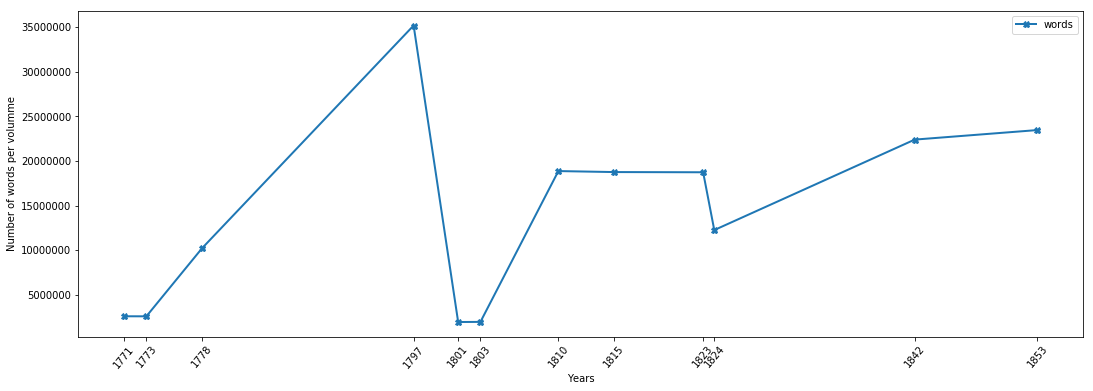

In [41]:
norm_publication=read_query_results('results_nls_normalized')

#for printing the values, we are going to sort the values by the years. 
#e.g --> First: 1771 year, with 3 documents, 2722 pages, and 2587557 words. 
#e.g --> Last: 1853 year, with 22 documents , 19628 pages and 23475295 words.
print sorted(norm_publication.items())

#and now we are going to plot the variation of number of words per volumme 
plot_norm_words(norm_publication)


## 2. Scottish Philosophers

We count the total number of words per year, and then count total instances of each phylosopher in it. Finally, we **plot normalised frequency** on a graph (x axis is years), to see whether it is a thing that is becoming more or less popular with time. 

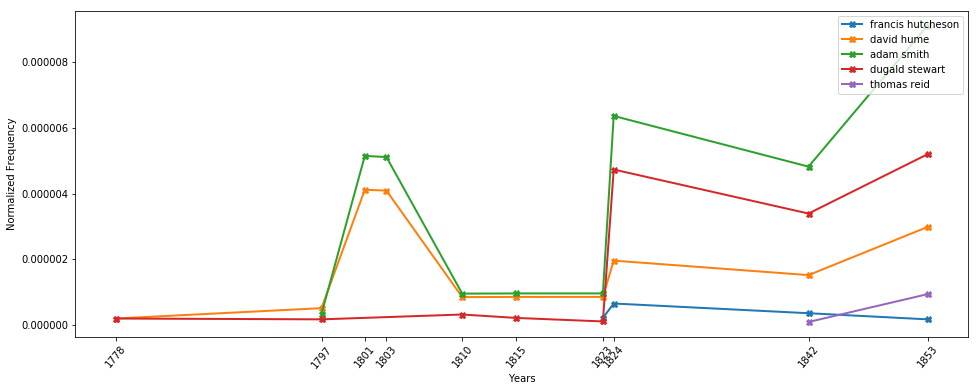

In [42]:
taxonomy= ['francis hutcheson', 'david hume', 'adam smith', 'dugald stewart', 'thomas reid']
query_results=read_query_results('results_ks_philosophers')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy)

### Without normalising - Visualising the raw frequencies 

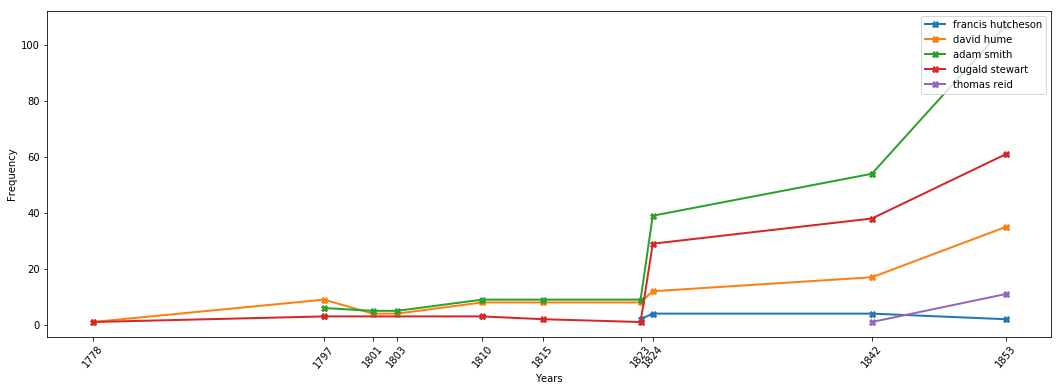

In [43]:
plot_freq_count(freq_count_lem, taxonomy)

In [44]:
# Exploring adam smith
print sorted(freq_count_lem['adam smith'].items())

[(1797, 6), (1801, 5), (1803, 5), (1810, 9), (1815, 9), (1823, 9), (1824, 39), (1842, 54), (1853, 107)]


## 3. Scottish Cities

We count the total number of words per year, and then count total instances of each city in it. Later we **plot normalised frequency** on a graph (x axis is years). 

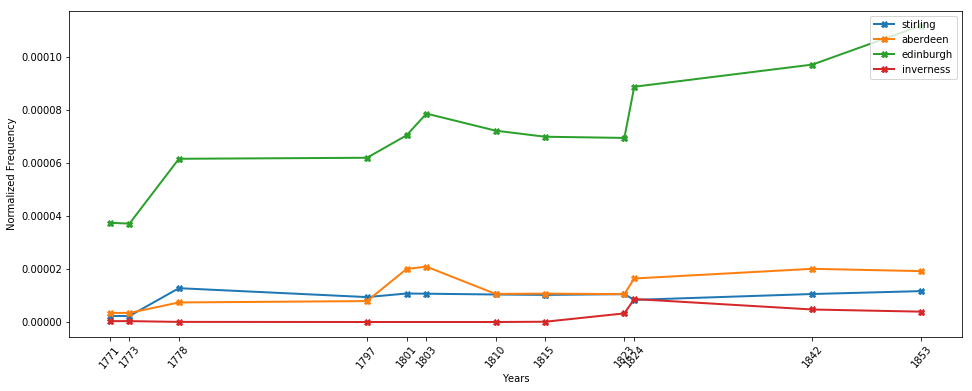

In [45]:
taxonomy= ['stirling', 'aberdeen', 'edinburgh', 'dundee' 'glasgow', 'inverness']
query_results=read_query_results('results_ks_cities')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy)

### Without normalising - Visualising the raw frequencies

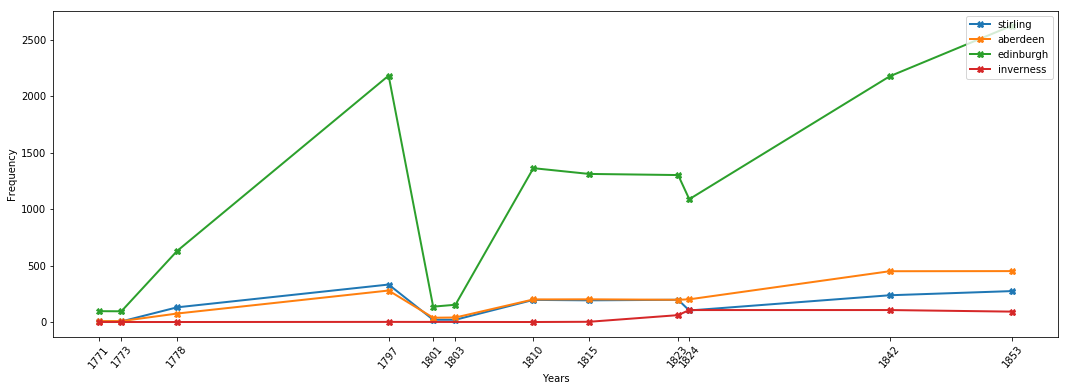

In [46]:
plot_freq_count(freq_count_lem, taxonomy)

In [47]:
# Exploring Edinburgh
print sorted(freq_count_lem['edinburgh'].items())

[(1771, 97), (1773, 96), (1778, 630), (1797, 2184), (1801, 137), (1803, 154), (1810, 1364), (1815, 1313), (1823, 1303), (1824, 1089), (1842, 2178), (1853, 2628)]


## 4. Sports

We count the total number of words per year, and then count total instances of each sport in it. Later we **plot normalised frequency** on a graph (x axis is years). 

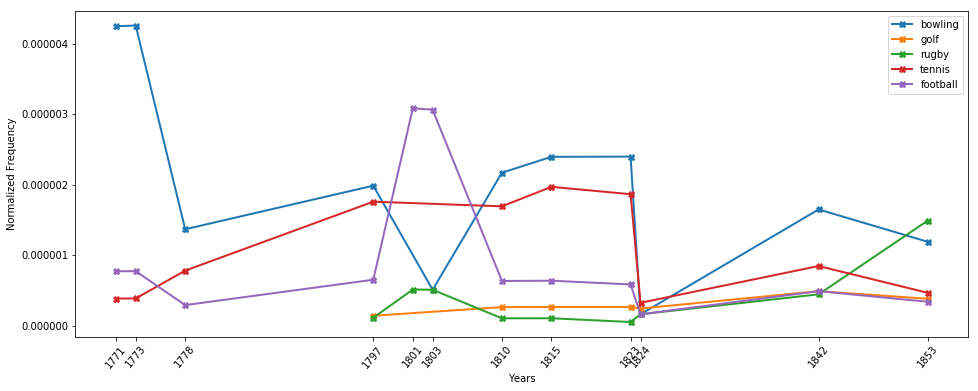

In [48]:
taxonomy= ['bowling', 'golf', 'rugby', 'tennis', 'football', 'shinty', 'real tennis', 'lawn bowl']
query_results=read_query_results('results_ks_sports')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy)

### Without Normalising - Visualising the  raw frequencies 

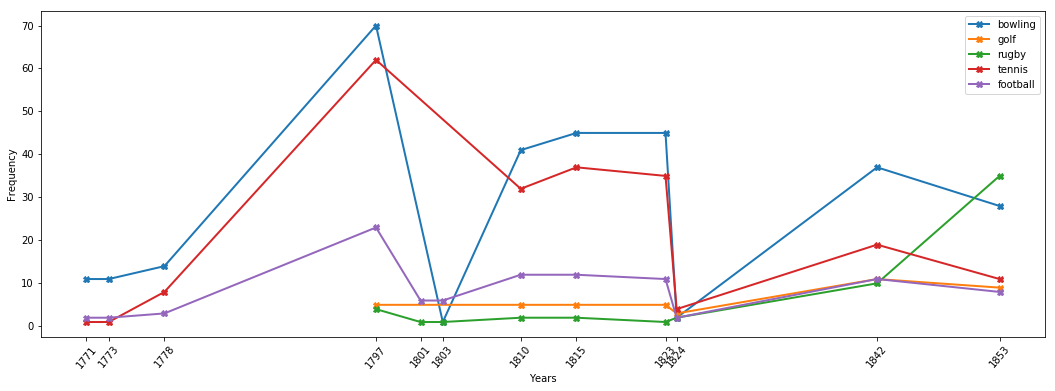

In [49]:
plot_freq_count(freq_count_lem, taxonomy)

In [50]:
# Exploring Bowling
print sorted(freq_count_lem['bowling'].items())

[(1771, 11), (1773, 11), (1778, 14), (1797, 70), (1803, 1), (1810, 41), (1815, 45), (1823, 45), (1824, 2), (1842, 37), (1853, 28)]


## 5. Animals

We count the total number of words per year, and then count total instances of each aninal in it. Later we **plot normalised frequency** on a graph (x axis is years). 

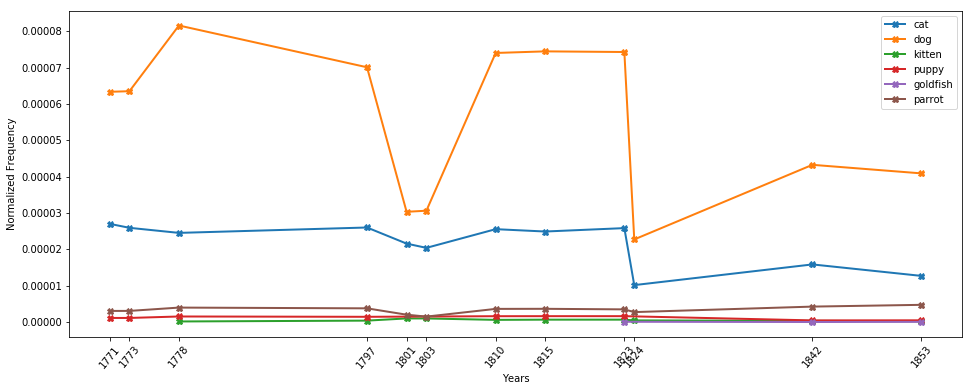

In [51]:
taxonomy= ['cat','dog', 'kitten', 'puppy', 'goldfish', 'parrot']
query_results=read_query_results('results_ks_animal')

freq_count_lem=freq_count(query_results)
normalize_freq(norm_publication, freq_count_lem, taxonomy)

### Without normalising - visualising the raw frequencies

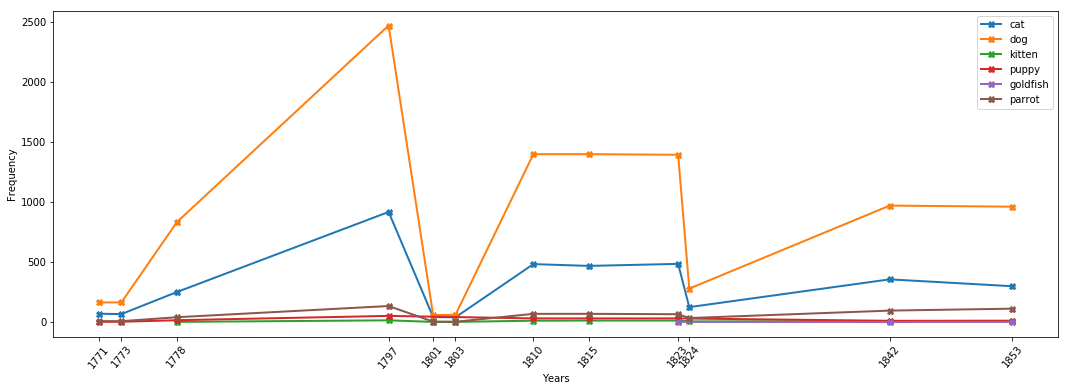

In [52]:
plot_freq_count(freq_count_lem, taxonomy)

In [53]:
#Exploring dog
print sorted(freq_count_lem['dog'].items())

[(1771, 164), (1773, 164), (1778, 834), (1797, 2469), (1801, 59), (1803, 60), (1810, 1398), (1815, 1398), (1823, 1393), (1824, 279), (1842, 970), (1853, 961)]
